# A Comprehensive Guide to the DataLoader Class and Abstractions in PyTorch

For a more detailed breakdown of the code, check out the full tutorial [on the blog](https://blog.paperspace.com/dataloaders-abstractions-pytorch).

### Looking at the MNIST Dataset in-Depth

In [17]:
# Downloading and Prinint MNIST Dataset
from torchvision.datasets import MNIST

data_train = MNIST('~/mnist_data', train=True, download=True)

print(data_train)
print(data_train[12])

Dataset MNIST
    Number of datapoints: 60000
    Root location: /root/mnist_data
    Split: Train
(<PIL.Image.Image image mode=L size=28x28 at 0x7F2B6CAC4BE0>, 3)


The label of the image is: 5


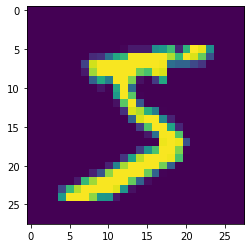

In [18]:
# Classifying a Number from the MNIST Dataset
import matplotlib.pyplot as plt

random_image = data_train[0][0]
random_image_label = data_train[0][1]

plt.imshow(random_image)
print("The label of the image is:", random_image_label)

### Using the Dataloader Class

In [19]:
import torch
from torchvision import transforms

data_train = torch.utils.data.DataLoader(
    MNIST('~/mnist_data', train=True, download=True, 
          transform = transforms.Compose([
              transforms.ToTensor()
          ])),
          batch_size=64,
          shuffle=True)

i = 0
for batch_idx, samples in enumerate(data_train):
    if i % 500 == 0:
        print(batch_idx, samples)
        
    i += 1
      # samples will be a 64 x D dimensional tensor
      # feed it to your neural network model
        

0 [tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ...,

### Loading Data Using GPUs

In [20]:
import torchvision

batch_size = 64
device = "cuda" if torch.cuda.is_available() else "cpu"
kwargs = {'num_workers': 1, 'pin_memory': True} if device=='cuda' else {}
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        '~/mnist_data',
        train=True,
        download=True),
        batch_size=batch_size,
        **kwargs)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        '~/mnist_data',
        train=False,
        download=True),
        batch_size=batch_size,
        **kwargs)

### Transforming and Rescaling the Data

In [21]:
# Importing Libraries
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Denfining Transforms
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [23]:
# Loading Dataset

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=False)

Files already downloaded and verified


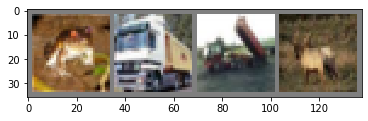

 frog truck truck  deer


In [24]:
# Visualising Dataset

import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
     img = img / 2 + 0.5
     npimg = img.numpy()
     plt.imshow(np.transpose(npimg, (1, 2, 0)))
     plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()    

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Creating Custom Datasets in PyTorch

In [25]:
# Import Libraries
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

In [26]:
# Defining Custom Dataset
class SquareDataset(Dataset):
     def __init__(self, a=0, b=1):
         super(Dataset, self).__init__()
         assert a <= b
         self.a = a
         self.b = b
        
     def __len__(self):
         return self.b - self.a + 1
        
     def __getitem__(self, index):
        assert self.a <= index <= self.b
        return index, index**2

In [27]:
# Loading Custom Dataset
data_train = SquareDataset(a=1,b=64)
data_train_loader = DataLoader(data_train, batch_size=64, shuffle=True)
print(len(data_train))

64
